# Diffusion Images

# Uniform

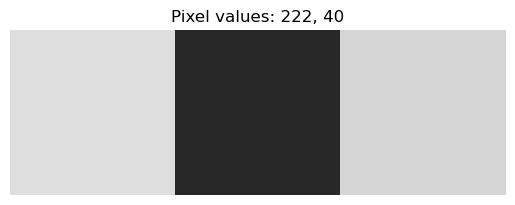

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample both pixels from a uniform distribution over [0, 255]
pixels = np.random.randint(0, 256, size=(1, 3), dtype=np.uint8)

# Display the image
plt.imshow(pixels, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title(f"Pixel values: {pixels[0, 0]}, {pixels[0, 1]}")
plt.show()


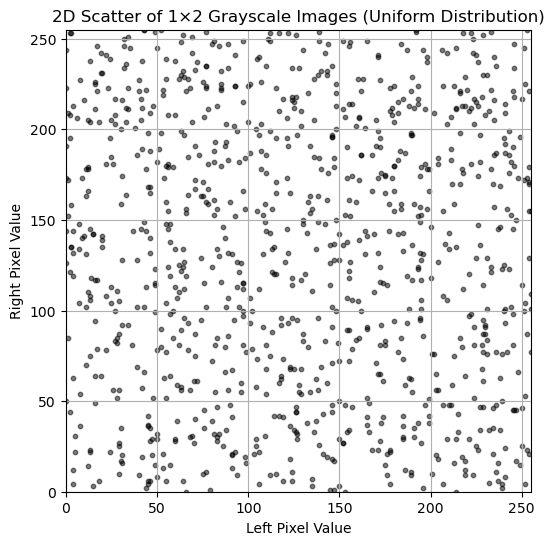

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 (1×2) samples from uniform distribution
samples = np.random.randint(0, 256, size=(1000, 2), dtype=np.uint8)

# Extract pixel values
x = samples[:, 0]  # Left pixel
y = samples[:, 1]  # Right pixel

# 2D scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.5, s=10, c='black')
plt.title("2D Scatter of 1×2 Grayscale Images (Uniform Distribution)")
plt.xlabel("Left Pixel Value")
plt.ylabel("Right Pixel Value")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()


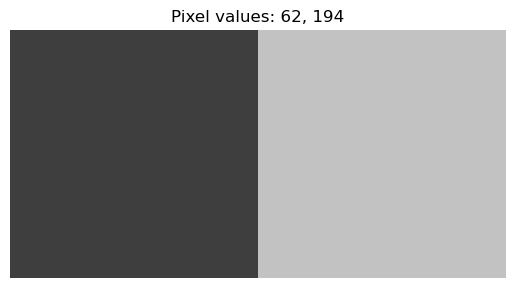

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# New mean and covariance
mean = [50, 200]
cov = [[100, 0],
       [0, 100]]

# Sample and clip
pixels = np.random.multivariate_normal(mean, cov, size=1).astype(np.int32)
pixels = np.clip(pixels, 0, 255).astype(np.uint8)

# Display the 1×2 grayscale image
plt.imshow(pixels, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title(f"Pixel values: {pixels[0, 0]}, {pixels[0, 1]}")
plt.show()


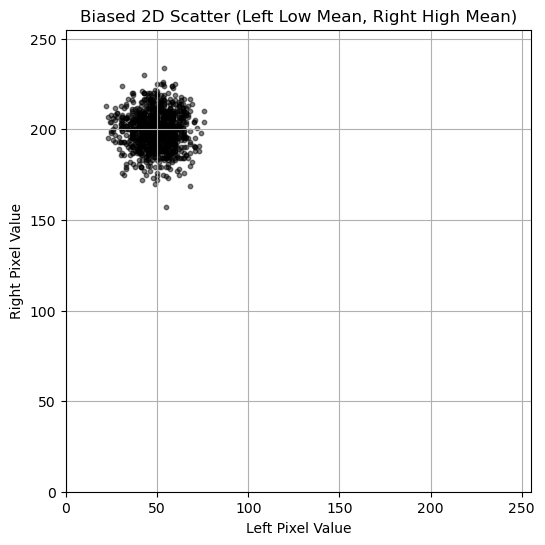

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and covariance
mean = [50, 200]
cov = [[100, 0],
       [0, 100]]

# Generate and clip
samples = np.random.multivariate_normal(mean, cov, size=1000).astype(np.int32)
samples = np.clip(samples, 0, 255)

x = samples[:, 0]  # Left pixel
y = samples[:, 1]  # Right pixel

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.5, s=10, c='black')
plt.title("Biased 2D Scatter (Left Low Mean, Right High Mean)")
plt.xlabel("Left Pixel Value")
plt.ylabel("Right Pixel Value")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()


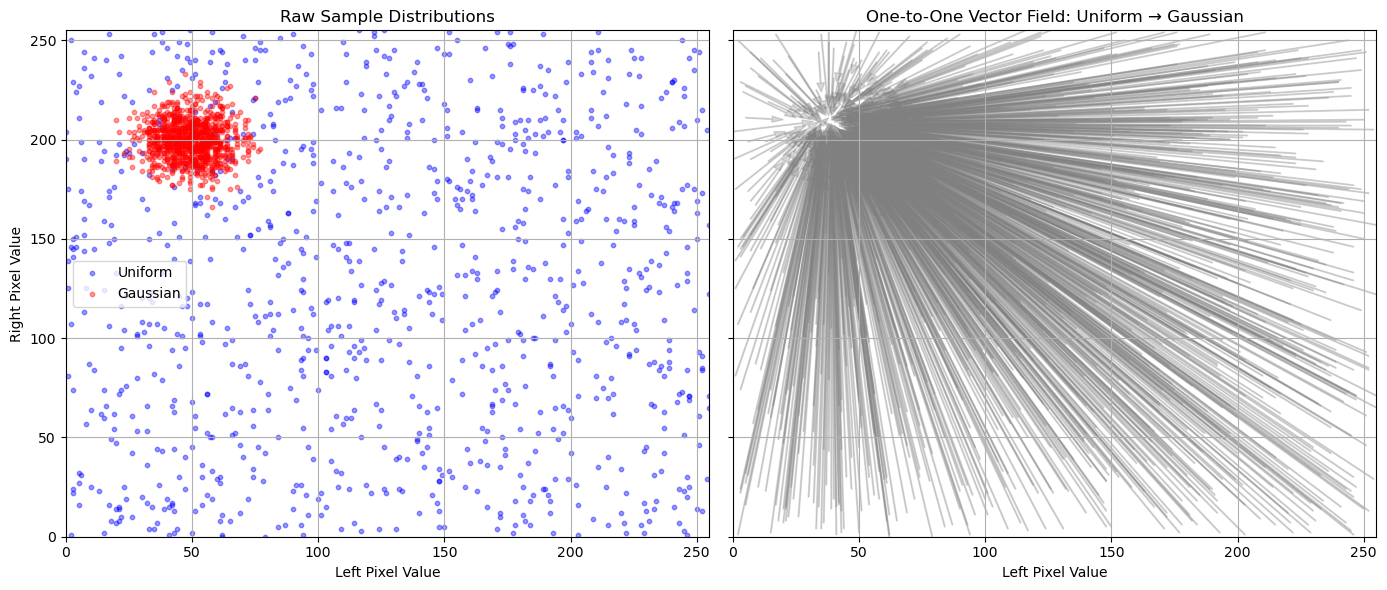

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

# --- 1. Generate Samples ---
n_samples = 1000

# Uniform samples
uniform_samples = np.random.randint(0, 256, size=(n_samples, 2), dtype=np.uint8)

# Biased Gaussian samples
mean = [50, 200]
cov = [[100, 0],
       [0, 100]]
gaussian_samples = np.random.multivariate_normal(mean, cov, size=n_samples).astype(np.int32)
gaussian_samples = np.clip(gaussian_samples, 0, 255)

# --- 2. Solve Optimal Assignment (Hungarian Algorithm) ---
# Compute pairwise cost matrix (Euclidean distances)
cost_matrix = cdist(uniform_samples, gaussian_samples, metric='euclidean')

# Find optimal 1-to-1 assignment
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# --- 3. Create Side-by-Side Plots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot 1: Raw Distributions
axes[0].scatter(uniform_samples[:, 0], uniform_samples[:, 1], color='blue', alpha=0.4, s=10, label='Uniform')
axes[0].scatter(gaussian_samples[:, 0], gaussian_samples[:, 1], color='red', alpha=0.4, s=10, label='Gaussian')
axes[0].set_title("Raw Sample Distributions")
axes[0].set_xlabel("Left Pixel Value")
axes[0].set_ylabel("Right Pixel Value")
axes[0].legend()
axes[0].grid(True)

# Plot 2: Full Vector Field from Uniform → Matched Gaussian
for i in range(n_samples):
    u = uniform_samples[row_ind[i]]
    g = gaussian_samples[col_ind[i]]
    axes[1].arrow(u[0], u[1], g[0]-u[0], g[1]-u[1],
                  color='gray', alpha=0.3, width=0.3, head_width=3, length_includes_head=True)
axes[1].set_title("One-to-One Vector Field: Uniform → Gaussian")
axes[1].set_xlabel("Left Pixel Value")
axes[1].grid(True)

# Set limits and display
for ax in axes:
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
plt.tight_layout()
plt.show()
